# Bayesian Linear Regression: implementation on simple example

Implementation of Christopher Bishop's book chapter 3: Pattern Recognition and Machine Learning

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
from scipy.stats import multivariate_normal

### Univariate Case

We consider $X$, $Y$, and $\epsilon$ three random variables such that $Y=1+2X+\epsilon$ with $\epsilon$~N(0,1)

We will be looking for $w=(w_0,w_1)$ such that $Y=w_0+w_1X+\epsilon$ and $w_{origin}=(1,2)$

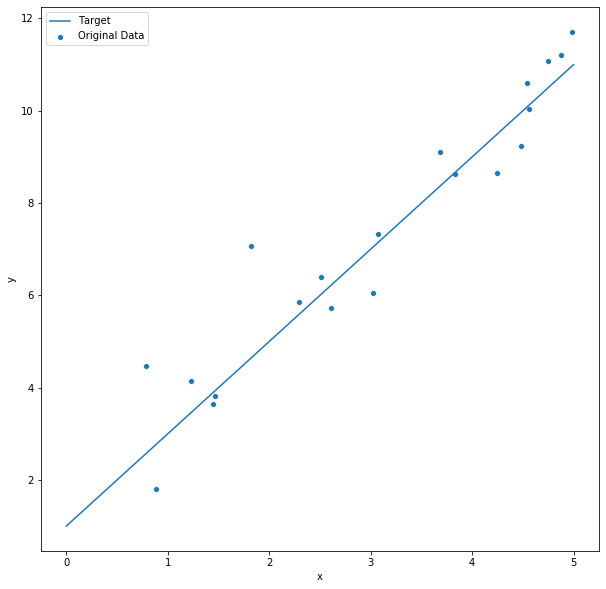

In [2]:
w_origin=np.array([1,2])

axis_max=5

x_uni=np.array([axis_max*np.random.uniform() for i in range(20)])
y_uni=np.array([w_origin.dot(np.array([1,x_i]))+np.random.randn() for x_i in x_uni])

x_axis=np.linspace(0,axis_max,200)
y_target=2*x_axis+1

plt.figure(figsize=(10,10))
sn.scatterplot(x_uni,y_uni, label="Original Data")
plt.plot(x_axis,y_target,label="Target")

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

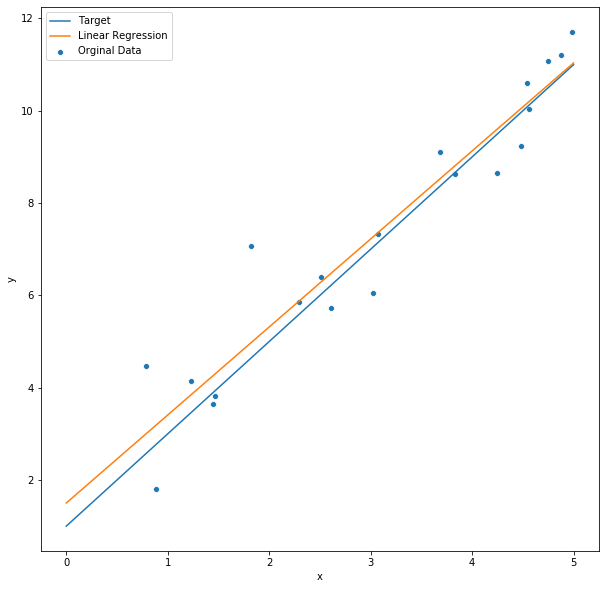

In [3]:
from sklearn.linear_model import LinearRegression

reg=LinearRegression()
reg.fit(x_uni.reshape(-1,1),y_uni.reshape(-1,1))

plt.figure(figsize=(10,10))
sn.scatterplot(x_uni,y_uni, label="Orginal Data")
plt.plot(x_axis,y_target,label="Target")
plt.plot(x_axis,reg.predict(x_axis.reshape(-1,1)),label="Linear Regression")

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [4]:
#Computation prior
alpha=1
beta=1

mean_prior=np.array((0,0))
cov_prior=alpha*np.identity(2)

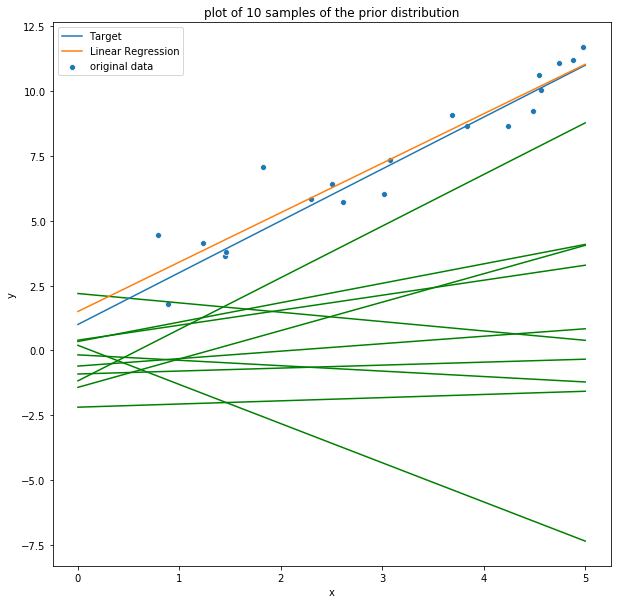

In [5]:
plt.figure(figsize=(10,10))
sn.scatterplot(x_uni,y_uni, label="original data")

n_curves=10

y_priors=[]

for w in np.random.multivariate_normal(mean_prior, cov_prior,n_curves):
    
    y_priors.append([w.dot(np.array((1,x)))for x in x_axis])
    

for y_prior in y_priors:
    plt.plot(x_axis,y_prior,color="green")


plt.plot(x_axis,y_target,label="Target")
plt.plot(x_axis,reg.predict(x_axis.reshape(-1,1)),label="Linear Regression")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("plot of 10 samples of the prior distribution")
plt.show()

In [6]:
phi=np.array([[1,x_i]for x_i in x_uni])
t=np.array([[y_i]for y_i in y_uni])

cov_post_f=np.linalg.inv(alpha*np.identity(2)+beta*phi.T.dot(phi))
mean_post_f=beta*cov_post_f.dot(phi.T).dot(t)

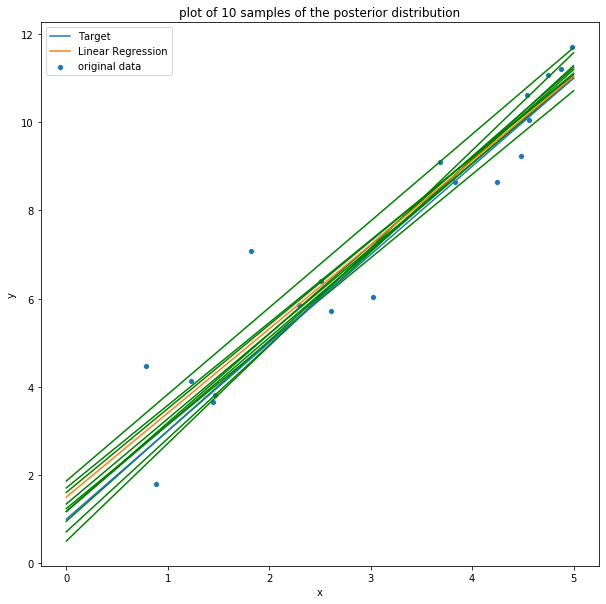

In [7]:
plt.figure(figsize=(10,10))
sn.scatterplot(x_uni,y_uni, label="original data")

n_curves=10

y_posts=[]

for w in np.random.multivariate_normal(mean_post_f.reshape(1,-1)[0], cov_post_f,n_curves):
    y_posts.append([w.dot(np.array((1,x)))for x in x_axis])
    

for y_post in y_posts:
    plt.plot(x_axis,y_post,color="green")

plt.plot(x_axis,y_target,label="Target")
plt.plot(x_axis,reg.predict(x_axis.reshape(-1,1)),label="Linear Regression")
plt.title("plot of 10 samples of the posterior distribution")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

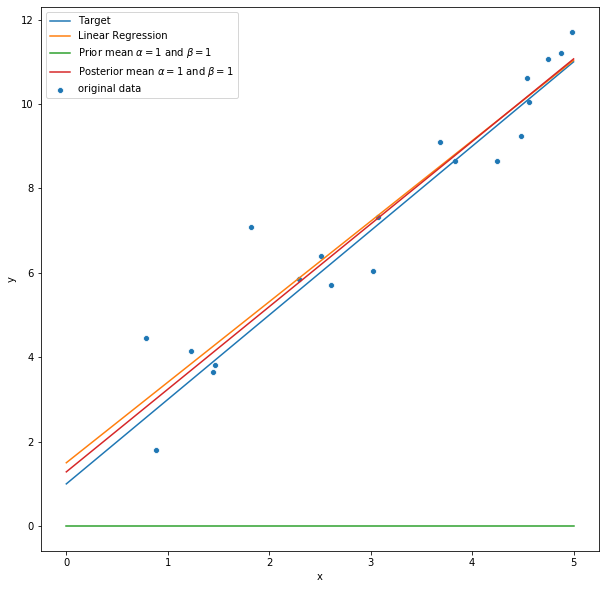

In [8]:
plt.figure(figsize=(10,10))
sn.scatterplot(x_uni,y_uni, label="original data")

plt.plot(x_axis,y_target,label="Target")
plt.plot(x_axis,reg.predict(x_axis.reshape(-1,1)),label="Linear Regression")

plt.plot(x_axis,[mean_prior.dot(np.array((1,x)))for x in x_axis],label=r"Prior mean $\alpha=1$ and $\beta=1$")
plt.plot(x_axis,[mean_post_f.reshape(1,-1)[0].dot(np.array((1,x)))for x in x_axis],label=r"Posterior mean $\alpha=1$ and $\beta=1$")


plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

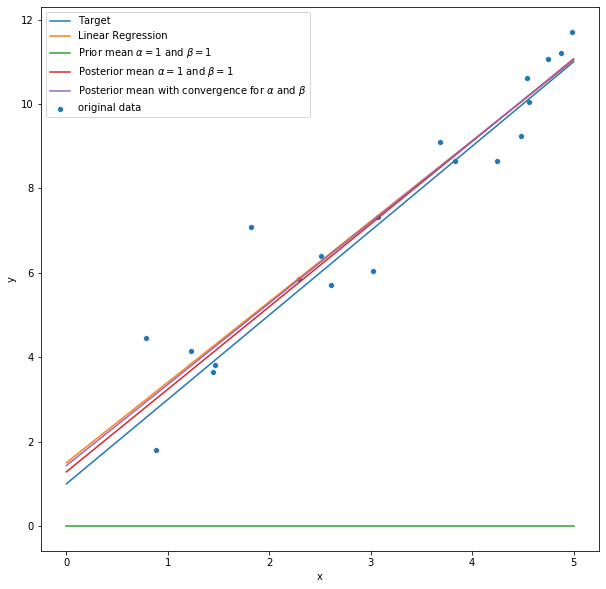

In [9]:
#choosing alpha and beta from the distribution

alpha0=0.5
beta0=0.5
phi=np.array([[1,x_i]for x_i in x_uni])
t=np.array([[y_i]for y_i in y_uni])
D=2

def get_mean_posterior(alpha,beta,phi,t,D):
    
    mean_prior=np.array([0 for i in range(D)])
    cov_prior=alpha**-1*np.identity(D)
    
    cov_post=np.linalg.inv(np.linalg.inv(cov_prior)+beta*phi.T.dot(phi))
    mean_post=beta*cov_post.dot(phi.T).dot(t)
    
    return mean_post

def get_alpha_beta(alpha0,beta0,phi, t, D,accuracy=10**-3):
    
    eigen_values=np.linalg.eig(beta0*phi.T.dot(phi))[0]
    
    gamma=sum([l/(l+alpha0) for l in eigen_values])
    
    A=alpha0*np.identity(D)+beta0*phi.T.dot(phi)
    mean_post=beta0*np.linalg.inv(A).dot(phi.T.dot(t))
    
    alpha=gamma/float(mean_post.T.dot(mean_post))
    beta=(len(phi)-gamma)/sum((t-phi.dot(mean_post))**2)[0]
    
    while abs(alpha-alpha0)>accuracy or abs(beta-beta0)>accuracy:
    
        alpha0,beta0=alpha,beta
        
        eigen_values=np.linalg.eig(beta0*phi.T.dot(phi))[0]
        
        gamma=sum([l/(l+alpha0) for l in eigen_values])
        
        A=alpha0*np.identity(D)+beta0*phi.T.dot(phi)
        mean_post=beta0*np.linalg.inv(A).dot(phi.T.dot(t))
        
        alpha=gamma/float(mean_post.T.dot(mean_post))
        beta=(len(phi)-gamma)/sum((t-phi.dot(mean_post))**2)[0]
        
        
    
    return alpha,beta,mean_post



alpha,beta,mean_post_opt=get_alpha_beta(alpha0,beta0,phi,t,D)


plt.figure(figsize=(10,10))
sn.scatterplot(x_uni,y_uni, label="original data")

plt.plot(x_axis,y_target,label="Target")
plt.plot(x_axis,reg.predict(x_axis.reshape(-1,1)),label="Linear Regression")

plt.plot(x_axis,[mean_prior.dot(np.array((1,x)))for x in x_axis],label=r"Prior mean $\alpha=1$ and $\beta=1$")
plt.plot(x_axis,[mean_post_f.reshape(1,-1)[0].dot(np.array((1,x)))for x in x_axis],label=r"Posterior mean $\alpha=1$ and $\beta=1$")

plt.plot(x_axis,[mean_post_opt.reshape(1,-1)[0].dot(np.array((1,x)))for x in x_axis],label=r"Posterior mean with convergence for $\alpha$ and $\beta$")


plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [10]:
print("True coefficients",[1,2])
print("Linear Regression coefficients",reg.intercept_,reg.coef_)
print(r"Prior Coefficients alpha=1 and beta=1",mean_prior)
print(r"Posterior Coefficients alpha=1 and beta=1", mean_post_f.T)
print(r"Posterior mean with convergence for alpha and beta", mean_post_opt.T)

True coefficients [1, 2]
Linear Regression coefficients [1.50071611] [[1.9072419]]
Prior Coefficients alpha=1 and beta=1 [0 0]
Posterior Coefficients alpha=1 and beta=1 [[1.28494988 1.95683723]]
Posterior mean with convergence for alpha and beta [[1.43175441 1.92360377]]


In [11]:
mean_prior

array([0, 0])

In [12]:
from sklearn.metrics import mean_squared_error as mse

print("Mean Squared Error Comparison")
print("True coefficients",mse(t,phi.dot(np.array((1,2)))))
print("Linear Regression coefficients",mse(t,reg.predict(x_uni.reshape(-1,1))))
print(r"Prior Coefficients alpha=1 and beta=1",mse(t,phi.dot(mean_prior.T)))
print(r"Posterior Coefficients alpha=1 and beta=1", mse(t,phi.dot(mean_post_f)))
print(r"Posterior mean with convergence for alpha and beta", mse(t,phi.dot(mean_post_opt)))

Mean Squared Error Comparison
True coefficients 0.7789858792563702
Linear Regression coefficients 0.7146751946541338
Prior Coefficients alpha=1 and beta=1 61.62755268076145
Posterior Coefficients alpha=1 and beta=1 0.72368513494108
Posterior mean with convergence for alpha and beta 0.7155666016238433


### Multivriate case

We consider $X$, $Y$, and $\epsilon$ three random variables such that $Z=1+2X+Y+\epsilon$ with $\epsilon$~N(0,1)

We will be looking for $w=(w_0,w_1,w_2)$ such that $Z=w_0+w_1X+w_2Y+\epsilon$ and $w_{origin}=(1,2,1)$

Text(0, 0.5, 'z')

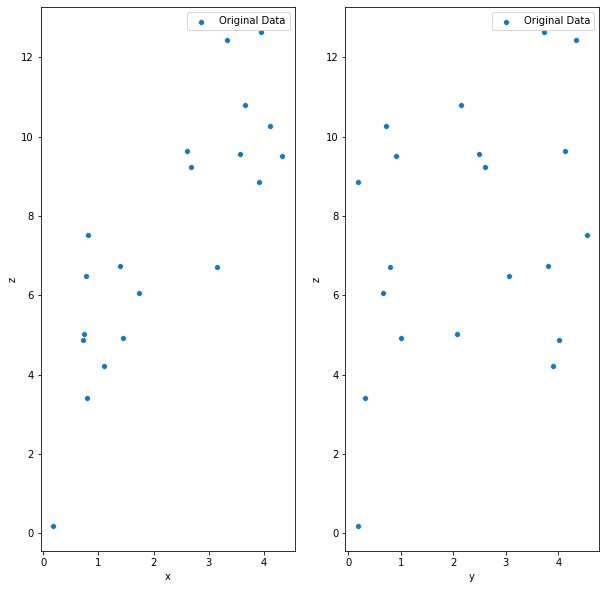

In [17]:
w_origin=np.array([1,2,1])

axis_max=5
n_values=20
x=np.array([axis_max*np.random.uniform() for i in range(n_values)])
y=np.array([axis_max*np.random.uniform() for i in range(n_values)])
z=np.array([w_origin.dot(np.array([1,x[i],y[i]]))+np.random.randn() for i in range(n_values)])

axis=np.linspace(0,axis_max,200)

plt.figure(figsize=(10,10))

plt.subplot(121)
sn.scatterplot(x,z, label="Original Data")
plt.xlabel("x")
plt.ylabel("z")


plt.subplot(122)

sn.scatterplot(y,z, label="Original Data")
plt.xlabel("y")
plt.ylabel("z")

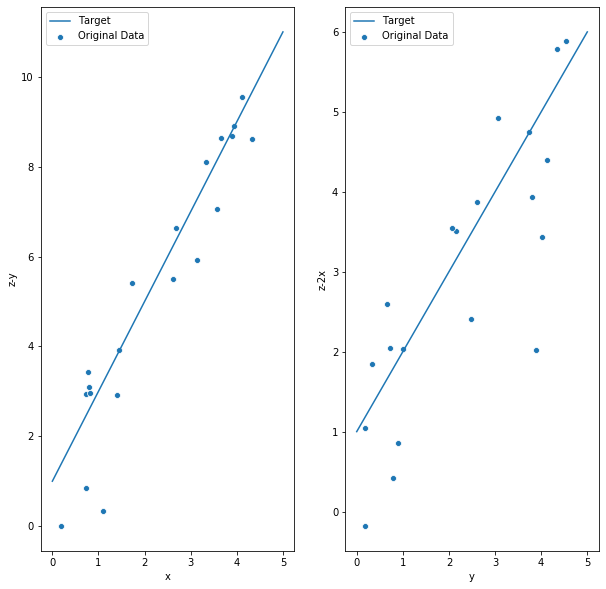

In [20]:
plt.figure(figsize=(10,10))

plt.subplot(121)


sn.scatterplot(x,z-y, label="Original Data")
plt.plot(axis,[w_origin.dot(np.array([1,x,0]))for x in axis],label="Target")
plt.xlabel("x")
plt.ylabel("z-y")
plt.legend()


plt.subplot(122)

sn.scatterplot(y,z-2*x, label="Original Data")
plt.plot(axis,[w_origin.dot(np.array([1,0,x]))for x in axis],label="Target")
plt.xlabel("y")
plt.ylabel("z-2x")
plt.legend()

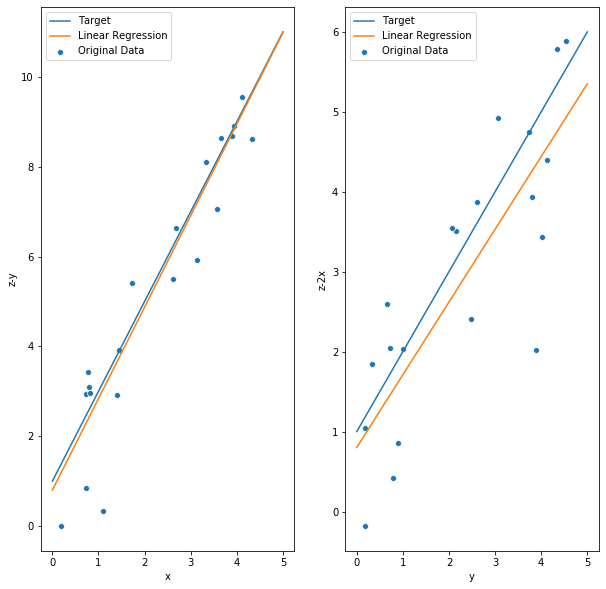

In [23]:
reg=LinearRegression(fit_intercept=False)
phi=np.array([[1,x[i],y[i]]for i in range(n_values)])
reg.fit(phi,z.reshape(-1,1))

plt.figure(figsize=(10,10))

plt.subplot(121)

sn.scatterplot(x,z-y, label="Original Data")
plt.plot(axis,[w_origin.dot(np.array([1,x,0]))for x in axis],label="Target")

phi_x=np.array([[1,x,0]for x in axis])
plt.plot(axis,reg.predict(phi_x),label="Linear Regression")

plt.xlabel("x")
plt.ylabel("z-y")
plt.legend()


plt.subplot(122)

sn.scatterplot(y,z-2*x, label="Original Data")
plt.plot(axis,[w_origin.dot(np.array([1,0,x]))for x in axis],label="Target")

phi_y=np.array([[1,0,y]for y in axis])
plt.plot(axis,reg.predict(phi_y),label="Linear Regression")

plt.xlabel("y")
plt.ylabel("z-2x")
plt.legend()

In [24]:
#Computation prior
alpha=1
beta=1

mean_prior=np.array((0,0,0))
cov_prior=alpha*np.identity(3)

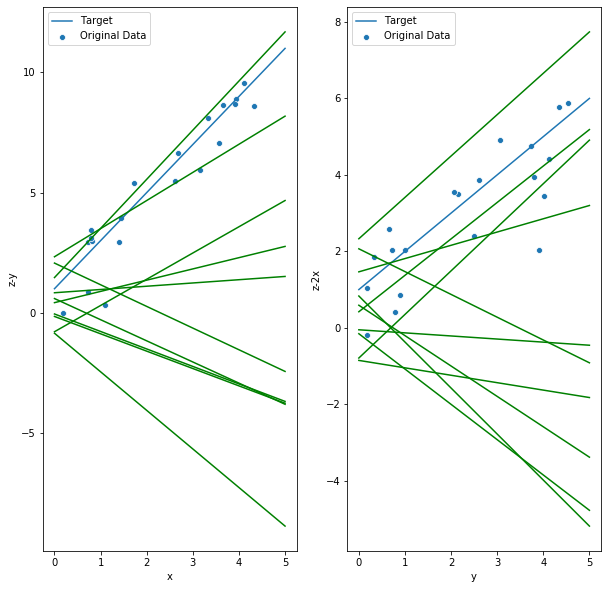

In [26]:
n_curves=10

w_prior=np.random.multivariate_normal(mean_prior, cov_prior,n_curves)

plt.figure(figsize=(10,10))

plt.subplot(121)


sn.scatterplot(x,z-y, label="Original Data")
plt.plot(axis,[w_origin.dot(np.array([1,x,0]))for x in axis],label="Target")


for w in w_prior:
    z_prior=[w.dot(np.array((1,x,0)))for x in axis]
    plt.plot(axis,z_prior,color="green")
    
plt.xlabel("x")
plt.ylabel("z-y")
plt.legend()


plt.subplot(122)

sn.scatterplot(y,z-2*x, label="Original Data")
plt.plot(axis,[w_origin.dot(np.array([1,0,x]))for x in axis],label="Target")
for w in w_prior:
    z_prior=[w.dot(np.array((1,0,y)))for y in axis]
    plt.plot(axis,z_prior,color="green")
plt.xlabel("y")
plt.ylabel("z-2x")
plt.legend()

In [27]:
phi=np.array([[1,x[i],y[i]]for i in range(n_values)])
t=z.reshape(-1,1)

cov_post=np.linalg.inv(1/alpha*np.identity(3)+beta*phi.T.dot(phi))
mean_post=beta*cov_post.dot(phi.T).dot(t)

#issue with the format of mean_post
mean_post_2=np.array((mean_post[0,0],mean_post[1,0]))

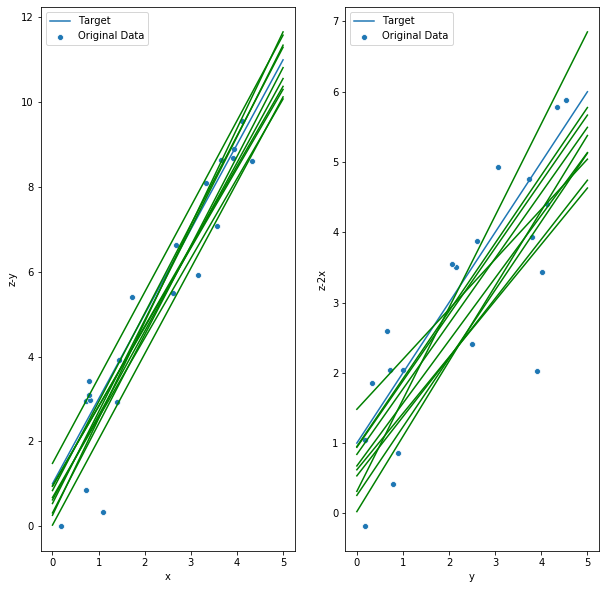

In [30]:
w_post=np.random.multivariate_normal(mean_post.reshape(1,-1)[0], cov_post,n_curves)

plt.figure(figsize=(10,10))

plt.subplot(121)
sn.scatterplot(x,z-y, label="Original Data")
plt.plot(axis,[w_origin.dot(np.array([1,x,0]))for x in axis],label="Target")

for w in w_post:
    z_post=[w.dot(np.array((1,x,0)))for x in axis]
    plt.plot(axis,z_post,color="green")
    
plt.xlabel("x")
plt.ylabel("z-y")
plt.legend()


plt.subplot(122)

sn.scatterplot(y,z-2*x, label="Original Data")
plt.plot(axis,[w_origin.dot(np.array([1,0,x]))for x in axis],label="Target")
for w in w_post:
    z_post=[w.dot(np.array((1,0,y)))for y in axis]
    plt.plot(axis,z_post,color="green")
plt.xlabel("y")
plt.ylabel("z-2x")
plt.legend()

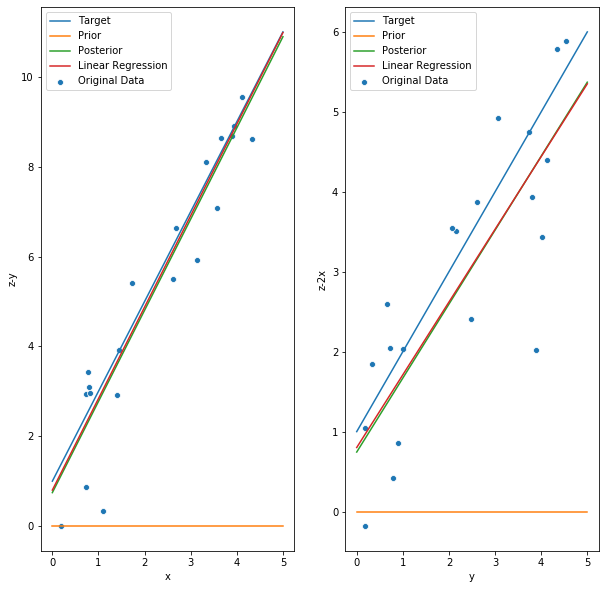

In [32]:
plt.figure(figsize=(10,10))

plt.subplot(121)
sn.scatterplot(x,z-y, label="Original Data")
plt.plot(axis,[w_origin.dot(np.array([1,x,0]))for x in axis],label="Target")
plt.plot(axis,[mean_prior.dot(np.array((1,x,0)))for x in axis],label="Prior")
plt.plot(axis,[mean_post.reshape(1,-1).dot(np.array((1,x,0)))for x in axis],label="Posterior")
plt.plot(axis,reg.predict(phi_x),label="Linear Regression")
    
plt.xlabel("x")
plt.ylabel("z-y")
plt.legend()


plt.subplot(122)

sn.scatterplot(y,z-2*x, label="Original Data")
plt.plot(axis,[w_origin.dot(np.array([1,0,y]))for y in axis],label="Target")
plt.plot(axis,[mean_prior.dot(np.array((1,0,y)))for y in axis],label="Prior")
plt.plot(axis,[mean_post.reshape(1,-1).dot(np.array((1,0,y)))for y in axis],label="Posterior")
plt.plot(axis,reg.predict(phi_y),label="Linear Regression")

plt.xlabel("y")
plt.ylabel("z-2x")
plt.legend()

In [33]:
print("True coefficients",[1,2,1])
print("Linear Regression coefficients",reg.coef_)
print("Prior Coefficients",mean_prior)
print("Posterior Coefficients", mean_post.tolist())

True coefficients [1, 2, 1]
Linear Regression coefficients [[0.80127688 2.03669071 0.90980511]]
Prior Coefficients [0 0 0]
Posterior Coefficients [[0.7445432378887094], [2.0296617530273], [0.9253015482395742]]
